# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
#import

import pandas as pd
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(train)

# TODO: Number of testing examples.
n_test = len(test)

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 4
Number of testing examples = 4
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

[]

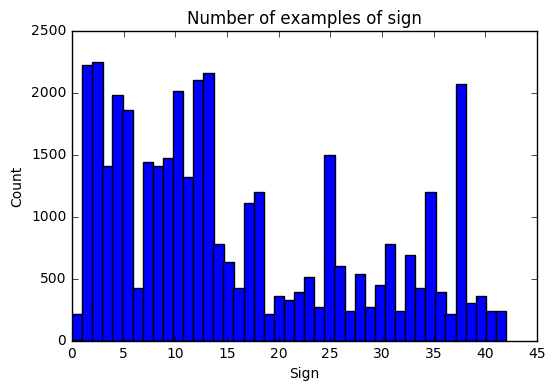

In [5]:
# Plot a histogram of the count of the number of examples of each sign
# in the test set

plt.hist(y_train, bins=n_classes, width=1)
plt.title('Number of examples of sign')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.plot()

Class 0: Speed limit (20km/h)                                210 samples


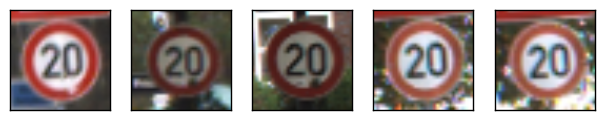

Class 1: Speed limit (30km/h)                                2220 samples


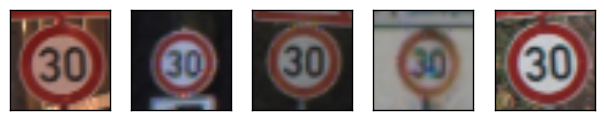

Class 2: Speed limit (50km/h)                                2250 samples


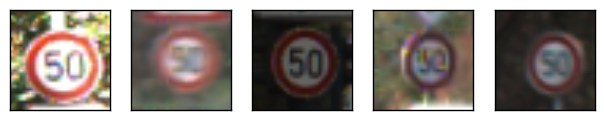

Class 3: Speed limit (60km/h)                                1410 samples


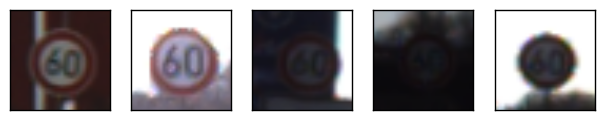

Class 4: Speed limit (70km/h)                                1980 samples


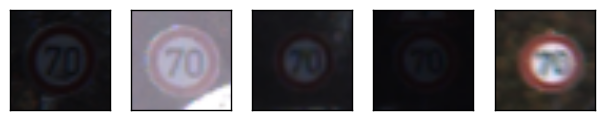

Class 5: Speed limit (80km/h)                                1860 samples


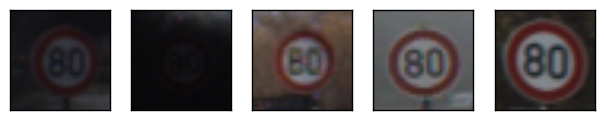

Class 6: End of speed limit (80km/h)                         420 samples


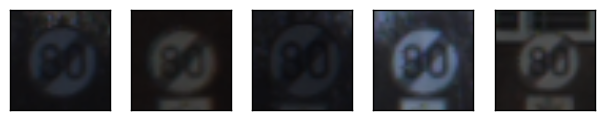

Class 7: Speed limit (100km/h)                               1440 samples


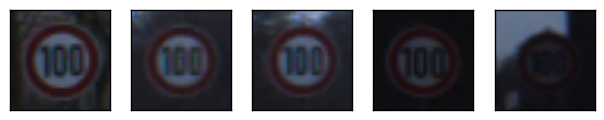

Class 8: Speed limit (120km/h)                               1410 samples


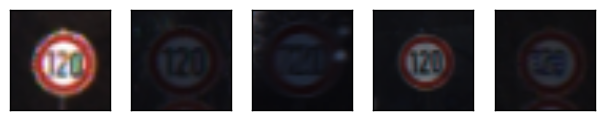

Class 9: No passing                                          1470 samples


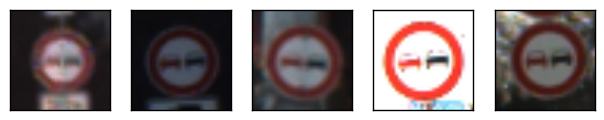

Class 10: No passing for vehicles over 3.5 metric tons        2010 samples


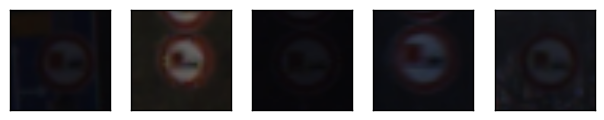

Class 11: Right-of-way at the next intersection               1320 samples


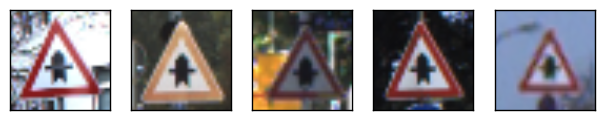

Class 12: Priority road                                       2100 samples


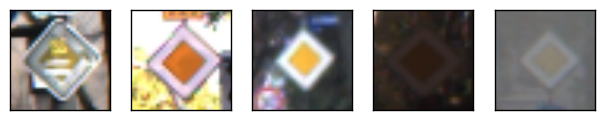

Class 13: Yield                                               2160 samples


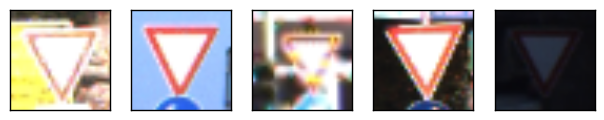

Class 14: Stop                                                780 samples


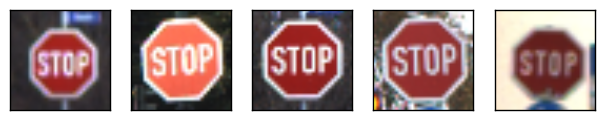

Class 15: No vehicles                                         630 samples


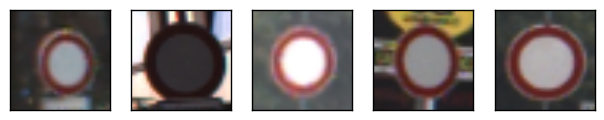

Class 16: Vehicles over 3.5 metric tons prohibited            420 samples


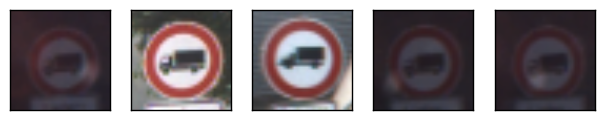

Class 17: No entry                                            1110 samples


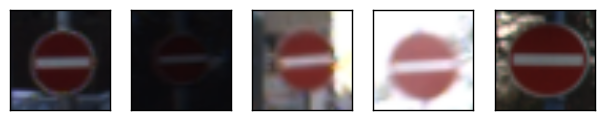

Class 18: General caution                                     1200 samples


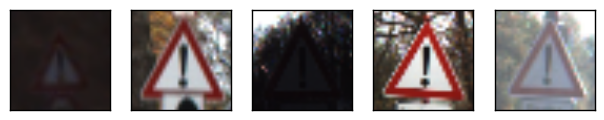

Class 19: Dangerous curve to the left                         210 samples


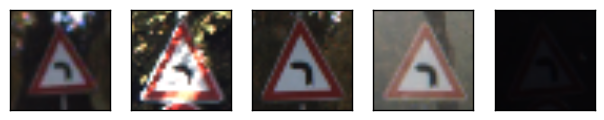

Class 20: Dangerous curve to the right                        360 samples


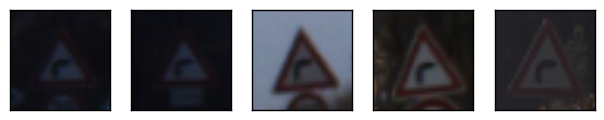

Class 21: Double curve                                        330 samples


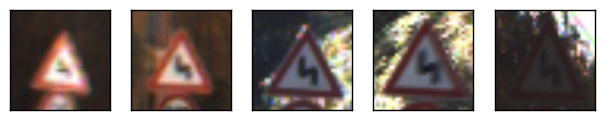

Class 22: Bumpy road                                          390 samples


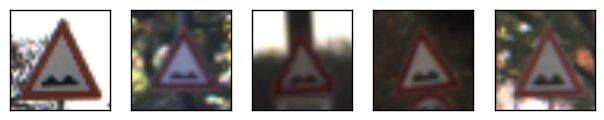

Class 23: Slippery road                                       510 samples


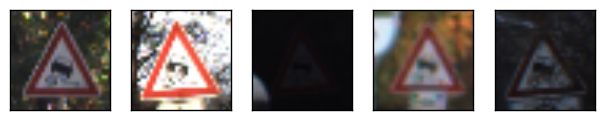

Class 24: Road narrows on the right                           270 samples


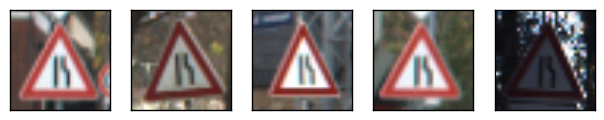

Class 25: Road work                                           1500 samples


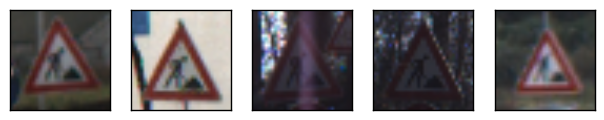

Class 26: Traffic signals                                     600 samples


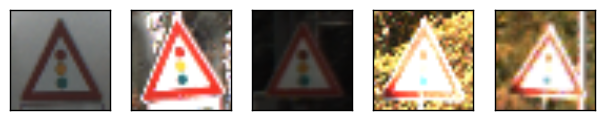

Class 27: Pedestrians                                         240 samples


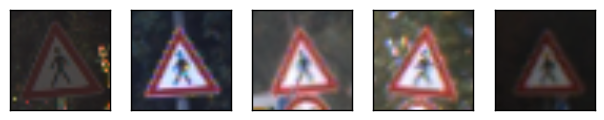

Class 28: Children crossing                                   540 samples


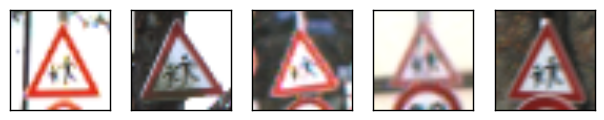

Class 29: Bicycles crossing                                   270 samples


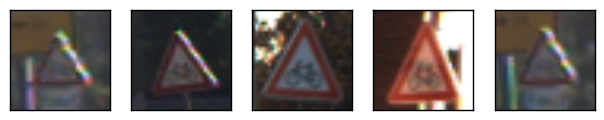

Class 30: Beware of ice/snow                                  450 samples


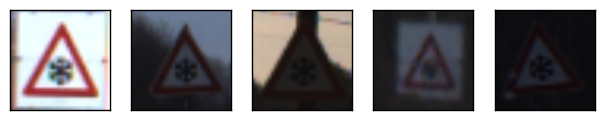

Class 31: Wild animals crossing                               780 samples


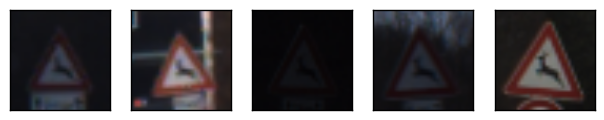

Class 32: End of all speed and passing limits                 240 samples


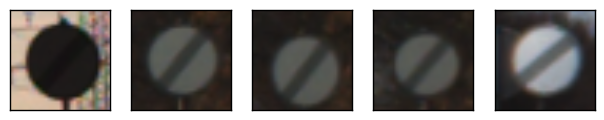

Class 33: Turn right ahead                                    689 samples


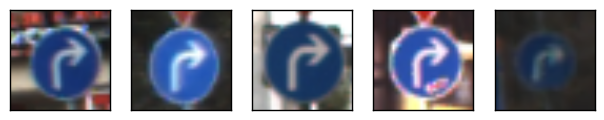

Class 34: Turn left ahead                                     420 samples


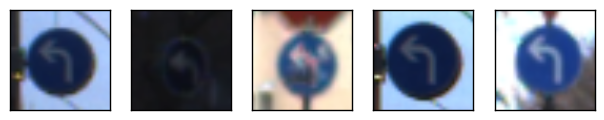

Class 35: Ahead only                                          1200 samples


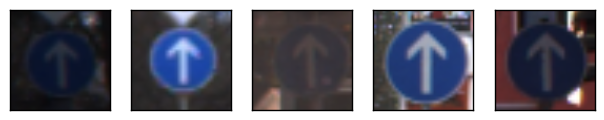

Class 36: Go straight or right                                390 samples


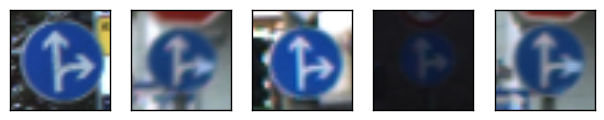

Class 37: Go straight or left                                 210 samples


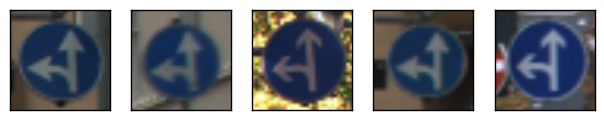

Class 38: Keep right                                          2070 samples


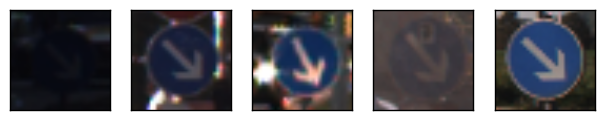

Class 39: Keep left                                           300 samples


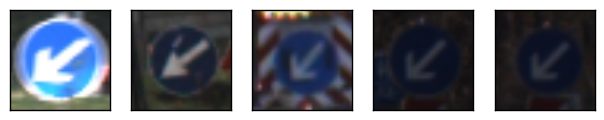

Class 40: Roundabout mandatory                                360 samples


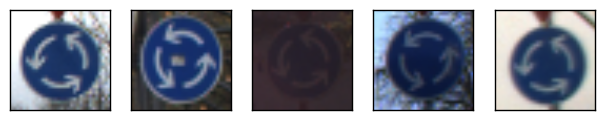

Class 41: End of no passing                                   240 samples


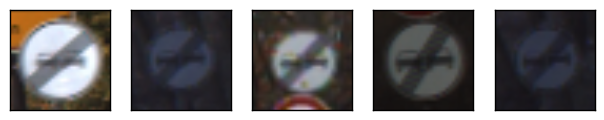

Class 42: End of no passing by vehicles over 3.5 metric tons  240 samples


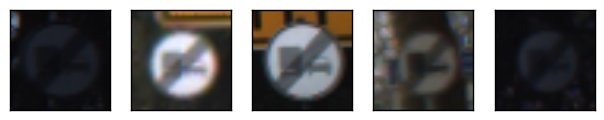

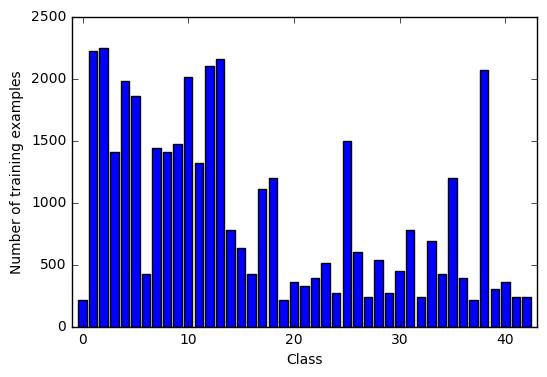

In [6]:
import numpy as np
import random
from pandas.io.parsers import read_csv

signnames = read_csv("signnames.csv").values[:, 1]
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
col_width = max(len(name) for name in signnames)

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i: %-*s  %s samples" % (c, col_width, signnames[c], str(c_count)))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 5)
    for i in range(5):
        axis = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    
plt.bar( np.arange( 43 ), class_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, 43])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Normalization

In [7]:
# Normalize the input data

X_train_norm = (X_train - X_train.mean())/ (np.max(X_train) - np.min(X_train))
X_test_norm = (X_test - X_test.mean())/ (np.max(X_test) - np.min(X_test))

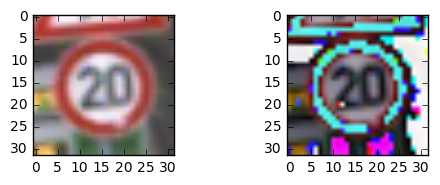

In [8]:
plt.subplot(2,2,1)
plt.imshow(X_train[10])
plt.subplot(2,2,2)
plt.imshow(X_train_norm[10])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

- I used normailization to keep the image pixel values.
- I didn't convert the grayscale because color information is useful for traffic sign classifier. In Japan, 'No Entry' and 'No Parking' are same except the color. 

### Split into training, validation and test sets

In [9]:
import numpy as np

def flip_extend(X, y):
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    self_flippable_both = np.array([32, 40])
    cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        if c in self_flippable_horizontally:
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        if c in cross_flippable[:, 0]:
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        if c in self_flippable_vertically:
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        if c in self_flippable_both:
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    return (X_extended, y_extended)

In [10]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, y_train = flip_extend(X_train_norm, y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Shuffle training examples

X_train, y_train = shuffle(X_train, y_train)

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

print("Trainning Set Data Size: %d" % X_train.shape[0])
print("Validation Set Data Size:%d" % X_val.shape[0])
print("Test Set Data Size: %d" % X_test.shape[0])

Trainning Set Data Size: 53902
Validation Set Data Size:13476
Test Set Data Size: 12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**  
I split the training data into training and validation using scikit learn's train test split function. I choose 20% for the validation set and 80% for the training set.  

I generate additional data fllipping method based on Daniel blog.  

http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/

At first, I trained my model without additional data, but I find that my model will likely overfit. Therefore, I plan to generate additional data based on Andrew lecture on Coursera. (He said that more training data will reduce the possibility of over fitting)  
My additional data is flipped data from original set because some signs could flip without changing the labels.

### My Network

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def my_net(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. 
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. 
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. 
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. 
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 3: Convolutional. 
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='SAME') + conv3_b
    
    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Pooling. 
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Fully connected

    conv3_shape = conv3.get_shape().as_list()
    fc1 = tf.reshape(conv3, [-1, conv3_shape[1]*conv3_shape[2]*conv3_shape[3]])
    
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 2048), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(2048))
    fc1 = tf.matmul(fc1, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob_1)
    
    fc2_W = tf.Variable(tf.truncated_normal(shape=(2048, 2048), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(2048))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob_2)
    
    fc3_W = tf.Variable(tf.truncated_normal(shape=(2048,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
                          
    return logits


In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob_1 = tf.placeholder(tf.float32)
keep_prob_2 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

In [13]:
rate = 0.001

logits = my_net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_1:1.0, keep_prob_2:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
I use the Convolutional Neural Network with below architecture:  
- Convolutional Layer1: 5x5x32  
- Max Pooling: 2x2 Kernel with step size of 2  
- Convolutional Layer2: 5x5x64  
- Max Pooling: 2x2 Kernel with step size of 2  
- Convolutional Layer3: 5x5x128  
- Max Pooling: 2x2 Kernel with step size of 2  
- Fully Connected Layer1: 2048 Neurons  
- Fully Connected Layer2: 1024 Neurons  
- Output Layer: 43 Neurons  
I use RELU activation function, dropout and uses full color information.

In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.

EPOCHS = 100
BATCH_SIZE = 256
SAVE_FILE = 'my_net_2'

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob_1:0.8, keep_prob_2:0.5})
            
        validation_accuracy = evaluate(X_val, y_val, BATCH_SIZE)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, SAVE_FILE)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.863

EPOCH 2 ...
Validation Accuracy = 0.945

EPOCH 3 ...
Validation Accuracy = 0.970

EPOCH 4 ...
Validation Accuracy = 0.982

EPOCH 5 ...
Validation Accuracy = 0.984

EPOCH 6 ...
Validation Accuracy = 0.982

EPOCH 7 ...
Validation Accuracy = 0.986

EPOCH 8 ...
Validation Accuracy = 0.985

EPOCH 9 ...
Validation Accuracy = 0.985

EPOCH 10 ...
Validation Accuracy = 0.983

EPOCH 11 ...
Validation Accuracy = 0.984

EPOCH 12 ...
Validation Accuracy = 0.986

EPOCH 13 ...
Validation Accuracy = 0.989

EPOCH 14 ...
Validation Accuracy = 0.988

EPOCH 15 ...
Validation Accuracy = 0.989

EPOCH 16 ...
Validation Accuracy = 0.984

EPOCH 17 ...
Validation Accuracy = 0.988

EPOCH 18 ...
Validation Accuracy = 0.989

EPOCH 19 ...
Validation Accuracy = 0.989

EPOCH 20 ...
Validation Accuracy = 0.991

EPOCH 21 ...
Validation Accuracy = 0.985

EPOCH 22 ...
Validation Accuracy = 0.990

EPOCH 23 ...
Validation Accuracy = 0.988

EPOCH 24 ...
Validation Accura

In [16]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('my_net_2.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    test_accuracy = evaluate(X_test, y_test, 256)
    print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8429136973473162


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  
- Type of optimiser: AdamOptimizer  
- Batch size: 256  
- Training Epochs: 100  
- Learning rate: 0.001  

Network Parameters:  
- Dropout (fully connected layer 1): 0.8  
- Dropout (fully connected layer 2): 0.5  
Padding: SAME  

I trained many times to avoid the overfitting. Finally, I find the better parameters as above.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

**1. Check the LeNet results ** 

At first, I used the LeNet in Udacity lesson, but I find that I need to improve the LeNet architecture because it doesn't reach the high training accuracy.  

**2. Search other architectures  **

I studied the CNN deeply such as below resources and LeCun lecture materials.  
http://cs231n.github.io  

http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf  

**3. Improve my model  **

I improved my model based on #2 search, new model had the 95% validation accuracy after 40 epochs, but the testing accuracy was 80%. Therefore, I conclude that my model was overfitting.   

**4. Improve my model more **

I repeated the #2 and #3 cycle many times and checked validation/test accuracy. Finaly I got the better model. Therefore, I tuned parameters such as Batch size, Training Epochs, Learning rate and Dropout rate. However, my model is still overfitting, so I need to improve my model after passing this project.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

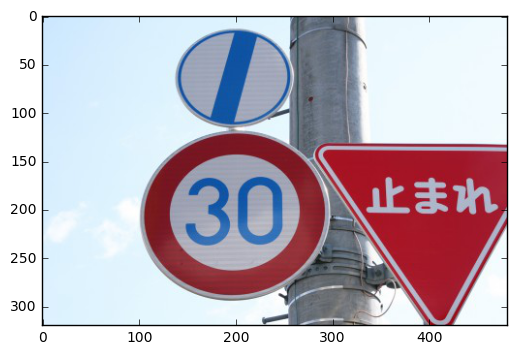

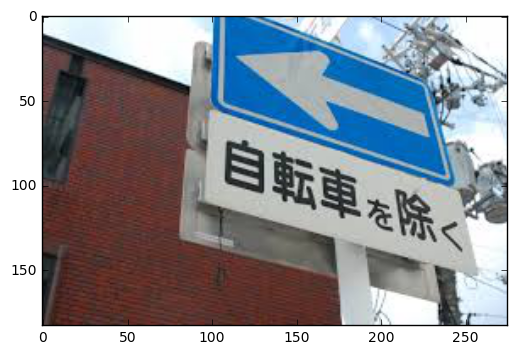

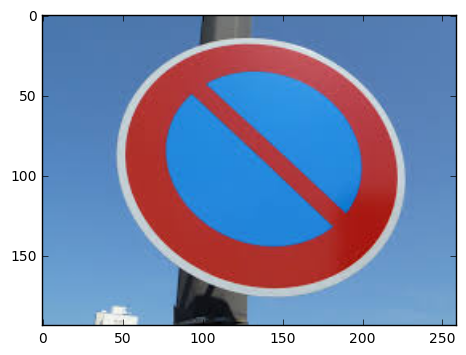

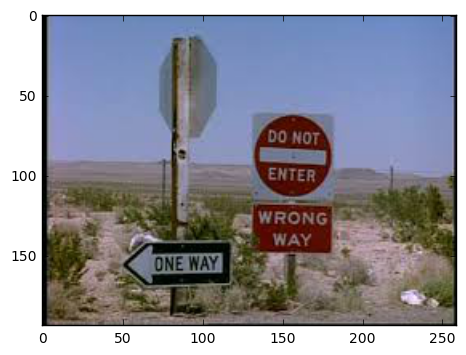

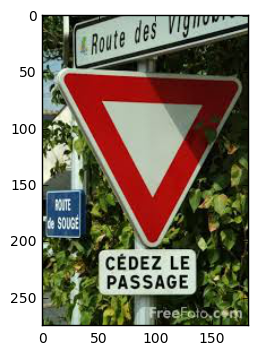

In [99]:
import matplotlib.image as mpimg

images = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

for imgname in images:
    image = mpimg.imread('new-images/' + imgname)
    plt.imshow(image)
    plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**  
I have collected images by Google search using "traffic sign", the datails are below.  
- No.1-3: Japan traffic sign  
- No.4: US traffic sign  
- No.5: French traffic sign   

I think that it might make crassification difficult because almost of my collected traffic signs are different from German traffic signs and include some signs in each picture. Therefore, my model doesn't generalize for my collected signs.

In [101]:
import os
import cv2

test_images = []
for imgname in images:
    img = cv2.imread('new-images/' + imgname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32,32))
    test_images.append(img)

test_images = np.array(test_images)

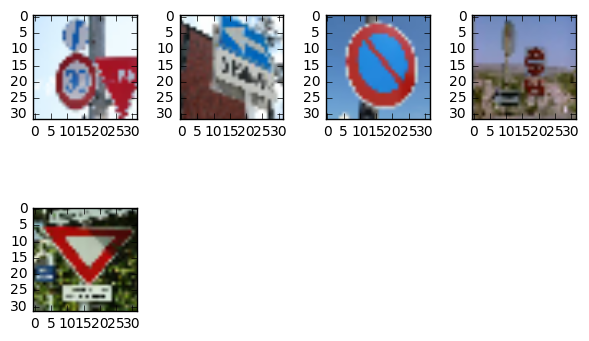

In [102]:
fig = plt.figure()

for i, image in enumerate(test_images):
    grid = plt.subplot(2,4,i+1)
    grid.imshow(image)

plt.tight_layout()
plt.show()

In [109]:
x_collected = np.array(test_images, dtype='uint8')
y_collected_true = np.array([1, 35, 15, 17, 13])

In [111]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('my_net_2.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    new_images_accuracy = evaluate(x_collected, y_collected_true, 5)
    print("New images accuracy: {}".format(new_images_accuracy))

New images accuracy: 0.20000000298023224


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**  
My model doesn't predict equally well for my collected images because it's 20% accurate.  
The images don't include the same traffic sign because I collect these images from other countries especially Japan.  
If I want to increase the accuracy for my data, I need to train my model for each countries traffic signs and increase the output neuron than 43.

In [166]:
test_images_norm = (test_images - test_images.mean())/ (np.max(test_images) - np.min(test_images))
new_images = np.reshape(test_images_norm, [-1, 32, 32, 3])

In [178]:
y_pred = tf.nn.softmax(logits)

with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('my_net_2.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    res = sess.run(y_pred, feed_dict={x: new_images, keep_prob_1:1.0, keep_prob_2:1.0})
    predicts = sess.run(tf.nn.top_k(res, k=5, sorted=True))

ValueError: Cannot feed value of shape (5, 32, 32, 3) for Tensor 'Placeholder_37:0', which has shape '(?, 3072)'

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**  

I'll fix my error for feed x and visualize the top 5 later.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.